In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
DataDescription = pd.read_excel('LogisticDataDictionary.xlsx')
DataDescription

<IPython.core.display.Javascript object>

,Feature,Description
0,age,age of policyholder
1,sex,male(1)/female(0)
2,bmi,body mass index(kg / $m^2$ )
3,children,number of children/dependents of policyholder
4,smoker,smoking state nonsmoker(0)/smoker(1)
5,region,residential area northeast(0)/northwest(1)/sou...
6,charges,medical cost
7,insuranceclaim,yes(1)/no(0)


In [3]:
train = pd.read_csv('train.csv')
train.head()

<IPython.core.display.Javascript object>

,Id,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,1182,25,0,30.30,0,0,3,2632.9920,1
1,990,26,0,19.80,1,0,3,3378.9100,0
2,123,44,1,31.35,1,1,0,39556.4945,1
3,184,44,1,30.69,2,0,2,7731.4271,0
4,1167,29,0,24.60,2,0,3,4529.4770,0


In [4]:
train.shape

(1070, 9)

In [5]:
test = pd.read_csv('test.csv')
test.head()

<IPython.core.display.Javascript object>

,Id,age,sex,bmi,children,smoker,region,charges
0,811,33,0,42.940,3,0,1,6360.99360
1,973,19,0,40.500,0,0,3,1759.33800
2,308,58,1,34.865,0,0,0,11944.59435
3,845,60,0,32.450,0,1,2,45008.95550
4,1050,44,0,36.955,1,0,1,8023.13545


In [6]:
train.isnull().sum()

Id                0
age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

<IPython.core.display.Javascript object>

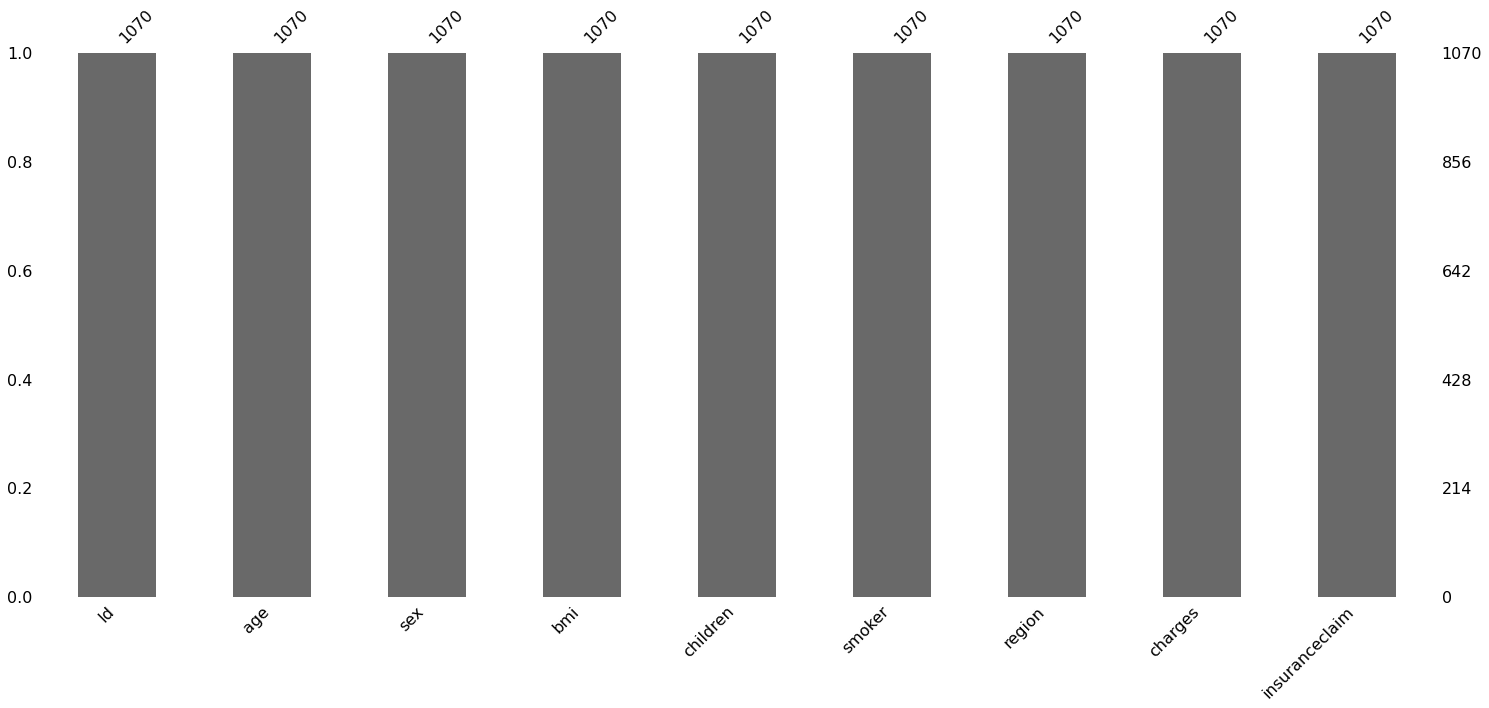

In [7]:
from IPython.display import display
pd.options.display.max_columns = None
import missingno as msno

msno.bar(train)

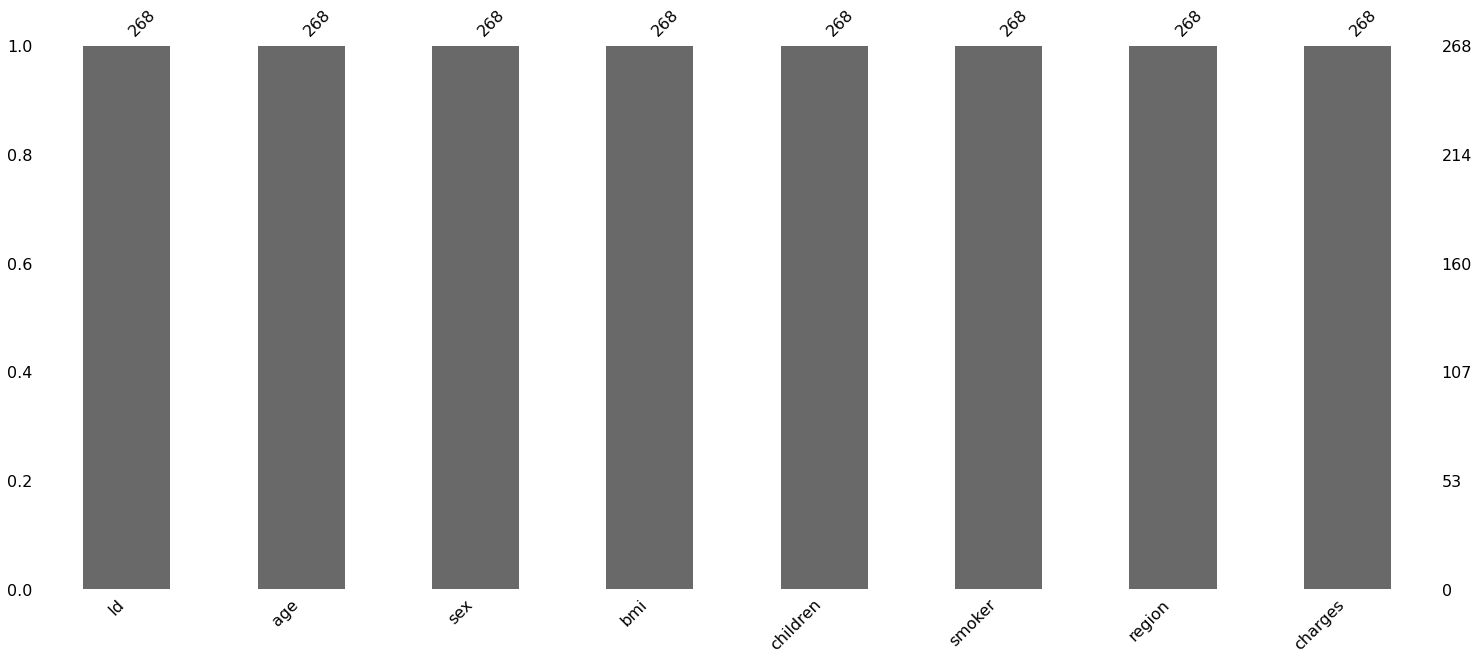

In [8]:
msno.bar(test)

In [9]:
test.isnull().sum()

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
for element in [train, test]:
    element.set_index('Id', inplace=True)

In [11]:
# Average charges for smoker & non-smoker
train.groupby('smoker').charges.mean()

smoker
0     8489.139477
1    31919.958887
Name: charges, dtype: float64

In [12]:
# Dividing the age category in two groups i.e. upto 40 & greater than 40
age_upto_40 = train[train['age']<= 40]
age_greater_than_40 = train[train['age']>40]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

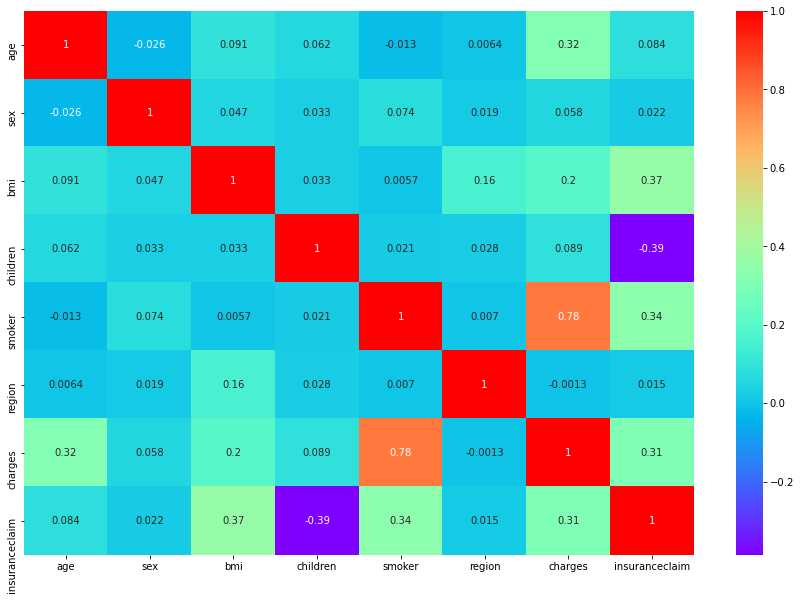

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True , cmap='rainbow')
plt.show()           

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

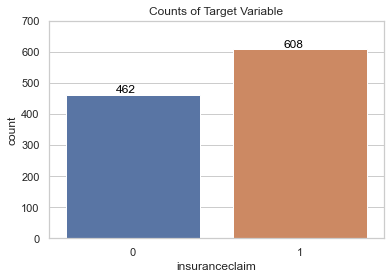

In [14]:
sns.set(style='whitegrid')
ax = sns.countplot(x='insuranceclaim', data=train)
plt.title('Counts of Target Variable')
plt.ylim(0,700)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.3, p.get_height()+1), va='bottom', color='black')
plt.show()    

In [15]:
def bmi_categories(bmi):
    if bmi <= 18.5 :
        return 'underweight'
    elif bmi > 18.5 and  bmi <= 25:
        return 'healthy'
    elif bmi > 25 and bmi <= 30:
        return 'overweight'
    elif bmi > 30 and bmi <= 35:
        return 'moderately obese'
    elif bmi > 35 and bmi <= 40:
        return 'severaly obese'
    else :
        return 'very severaly obese'

In [16]:
train['bmi_category'] = train.apply(lambda x : bmi_categories(x['bmi']), axis=1)

In [17]:
train.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim,bmi_category
Id,,,,,,,,,
1182,25,0,30.30,0,0,3,2632.9920,1,moderately obese
990,26,0,19.80,1,0,3,3378.9100,0,healthy
123,44,1,31.35,1,1,0,39556.4945,1,moderately obese
184,44,1,30.69,2,0,2,7731.4271,0,moderately obese
1167,29,0,24.60,2,0,3,4529.4770,0,healthy


In [18]:
test['bmi_category'] = test.apply( lambda x : bmi_categories(x['bmi']), axis=1)

In [19]:
test.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
Id,,,,,,,,
811,33,0,42.940,3,0,1,6360.99360,very severaly obese
973,19,0,40.500,0,0,3,1759.33800,very severaly obese
308,58,1,34.865,0,0,0,11944.59435,moderately obese
845,60,0,32.450,0,1,2,45008.95550,moderately obese
1050,44,0,36.955,1,0,1,8023.13545,severaly obese


In [20]:
train.bmi_category.replace({'underweight':0, 'healthy':1, 'overweight':2, 'moderately obese' : 3, 'severaly obese':4,
                            'very severaly obese':5}, inplace=True)

In [21]:
train.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim,bmi_category
Id,,,,,,,,,
1182,25,0,30.30,0,0,3,2632.9920,1,3
990,26,0,19.80,1,0,3,3378.9100,0,1
123,44,1,31.35,1,1,0,39556.4945,1,3
184,44,1,30.69,2,0,2,7731.4271,0,3
1167,29,0,24.60,2,0,3,4529.4770,0,1


In [22]:
test.bmi_category.replace({'underweight':0, 'healthy':1, 'overweight':2, 'moderately obese' : 3, 'severaly obese':4,
                            'very severaly obese':5}, inplace=True)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [24]:
X = train.drop('insuranceclaim', axis=1)
y = train['insuranceclaim']

In [25]:
X.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
Id,,,,,,,,
1182,25,0,30.30,0,0,3,2632.9920,3
990,26,0,19.80,1,0,3,3378.9100,1
123,44,1,31.35,1,1,0,39556.4945,3
184,44,1,30.69,2,0,2,7731.4271,3
1167,29,0,24.60,2,0,3,4529.4770,1


In [26]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.3, random_state=31)

In [27]:
from sklearn.metrics import roc_auc_score , accuracy_score

In [28]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)
roc = roc_auc_score(y_val, y_pred)
print('The Roc_Auc score is ', roc)

The Roc_Auc score is  0.8533649909939414


In [29]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [30]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index , 'TEST:', test_index)
    X_train_k , X_test_k = X.iloc[train_index], X.iloc[test_index]
    y_train_k , y_test_k = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 107  108  109  110  111  112  113  114  115  116  117  118  119  120
  121  122  123  124  125  126  127  128  129  130  131  132  133  134
  135  136  137  138  139  140  141  142  143  144  145  146  147  148
  149  150  151  152  153  154  155  156  157  158  159  160  161  162
  163  164  165  166  167  168  169  170  171  172  173  174  175  176
  177  178  179  180  181  182  183  184  185  186  187  188  189  190
  191  192  193  194  195  196  197  198  199  200  201  202  203  204
  205  206  207  208  209  210  211  212  213  214  215  216  217  218
  219  220  221  222  223  224  225  226  227  228  229  230  231  232
  233  234  235  236  237  238  239  240  241  242  243  244  245  246
  247  248  249  250  251  252  253  254  255  256  257  258  259  260
  261  262  263  264  265  266  267  268  269  270  271  272  273  274
  275  276  277  278  279  280  281  282  283  284  285  286  287  288
  289  290  291  292  293  294  295  296  297  298  299  300  301  302

TRAIN: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189  190  191  192  193  194  195

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train_k, y_train_k)
logreg_pred = logreg.predict(X_test_k)
logreg_roc = roc_auc_score(logreg_pred , y_test_k)
print('The ROC-AUC score using the Logistic Regression incorporating the KFold splits is :', logreg_roc)

The ROC-AUC score using the Logistic Regression incorporating the KFold splits is : 0.8585972850678733


In [32]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [ ]:
clf = LogisticRegression()
param_grid = dict(solver= ['liblinear','lbfgs','newton-cg'], C = np.arange(0.1,3,0.1), max_iter = [50,75,100])
grid_clf = GridSearchCV(clf, param_grid , scoring ='roc_auc', n_jobs=-1 , cv=5)
grid_clf.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [ ]:
grid_clf.best_params_

In [ ]:
grid_clf.best_score_

In [ ]:
grid_clf.best_estimator_

In [ ]:
clf.get_params().keys()

In [ ]:
clf_pred = grid_clf.best_estimator_.predict(X_val)
clf_roc_auc = roc_auc_score(y_val, clf_pred)
print('ROC-AUC score on validation data', clf_roc_auc)

## Test Data Evaluation

In [ ]:
test.head()

In [ ]:
test_y_pred = grid_clf.predict(test)
test_y_pred

In [ ]:
submission = pd.DataFrame({'Id': test.index , 'insuranceclaim' : test_y_pred})
submission.to_csv('ins_submission.csv' ,  index=False)